In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_cfpb = pd.read_csv("CFPB-financial-wellness-data.csv")
df_cfpb.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [3]:
df_cfpb.dtypes


PUF_ID           int64
sample           int64
fpl              int64
SWB_1            int64
SWB_2            int64
                ...   
PPT612           int64
PPT1317          int64
PPT18OV          int64
PCTLT200FPL      int64
finalwt        float64
Length: 217, dtype: object

In [4]:
df_cfpb.shape

(6394, 217)

In [5]:
df_cfpb = df_cfpb.drop("PUF_ID", axis= 1)
df_cfpb = df_cfpb.drop("sample", axis= 1)
df_cfpb = df_cfpb.drop("finalwt", axis= 1) #ID not needed

In [6]:
X = df_cfpb.iloc[:, df_cfpb.columns != 'PRODUSE_3']#independent columns
y = df_cfpb.iloc[:, df_cfpb.columns == 'PRODUSE_3']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(21))
plt.show()

/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00582691 0.00400422 0.00389409 0.00392032 0.00370661 0.00375995
 0.00403954 0.00401745 0.00409524 0.00434739 0.0034723  0.00343025
 0.00382984 0.00419697 0.00423395 0.00398863 0.00307607 0.00388729
 0.00394494 0.00340435 0.00320864 0.00346766 0.00404749 0.0036053
 0.0034572  0.00424366 0.00411424 0.00399627 0.00356651 0.00384663
 0.00306318 0.00367213 0.00379087 0.00405676 0.00424697 0.00370284
 0.00376388 0.00404891 0.00384433 0.00394972 0.00324523 0.00386918
 0.00337056 0.00433924 0.0041048  0.00469843 0.00387718 0.00321039
 0.00410487 0.00334974 0.00343706 0.00273936 0.00289677 0.00370087
 0.00333716 0.00532544 0.00360691 0.00374353 0.00364815 0.00315401
 0.00261406 0.00278717 0.00429556 0.00357034 0.00218323 0.00371521
 0.00381031 0.00414568 0.00345179 0.00337469 0.00244824 0.00372722
 0.00339326 0.0023194  0.00416629 0.00494995 0.00392628 0.00401204
 0.00327261 0.00316194 0.00305266 0.00369731 0.00710129 0.00359961
 0.00400762 0.00564308 0.00309553 0.0030321  0.00101325 0.00243

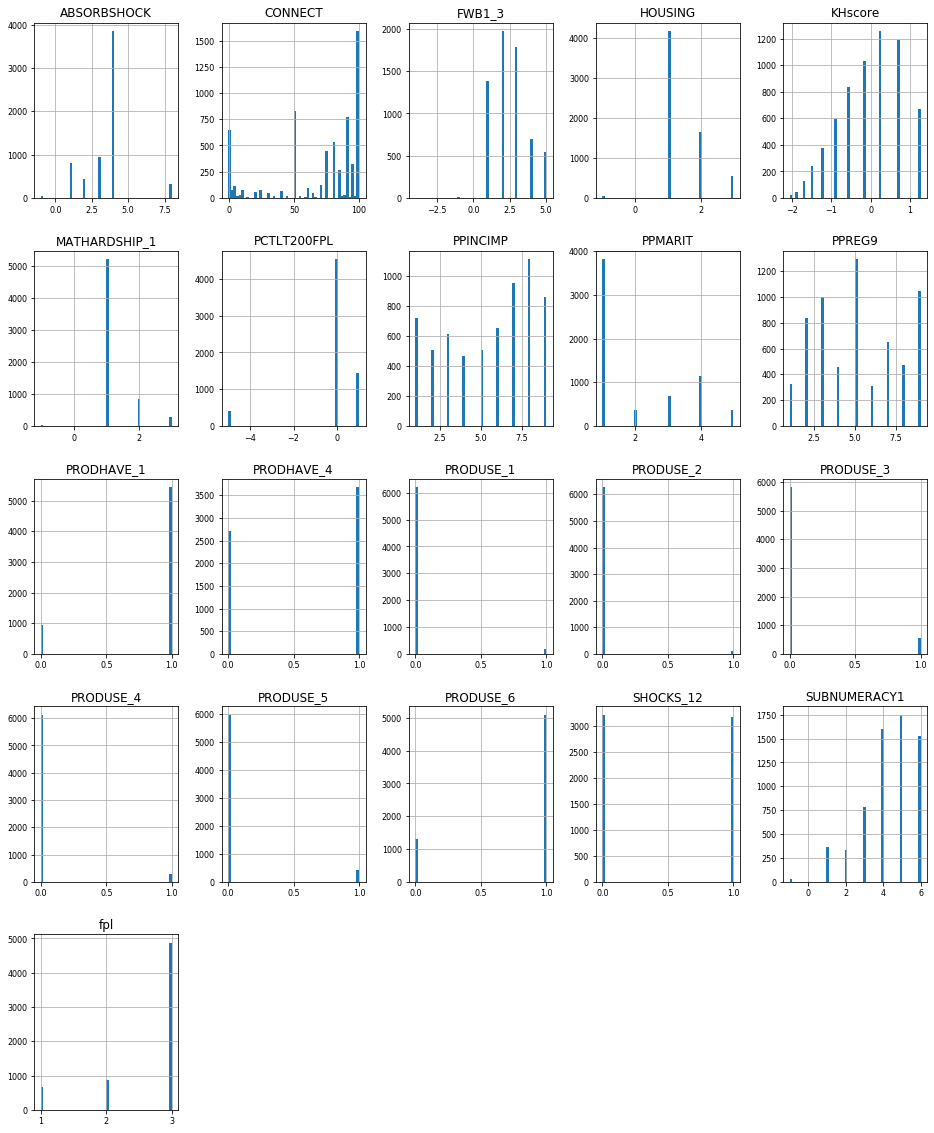

(6394, 21)

In [7]:
df_cfpb[['PRODUSE_3']].describe()


# Look at histograms of speccific columns
selected_columns = df_cfpb[['PRODUSE_6','PRODUSE_5','PRODUSE_4','PRODUSE_1','PRODHAVE_1','PPMARIT','PRODHAVE_4','PRODUSE_2',
                           'fpl','PPINCIMP','SHOCKS_12','CONNECT','KHscore','PCTLT200FPL','ABSORBSHOCK','SUBNUMERACY1',
                           'HOUSING','FWB1_3','PPREG9','MATHARDSHIP_1', 'PRODUSE_3']]

selected_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

selected_columns.shape

In [8]:
# removing rows with negative values 

selected_columns=selected_columns[(selected_columns.ABSORBSHOCK > 0) & (selected_columns.ABSORBSHOCK < 8)]
selected_columns=selected_columns[selected_columns.FWB1_3 > 0]
selected_columns=selected_columns[selected_columns.HOUSING > 0]
selected_columns=selected_columns[selected_columns.MATHARDSHIP_1 > 0]
selected_columns=selected_columns[selected_columns.PCTLT200FPL != -5]
selected_columns=selected_columns[selected_columns.SUBNUMERACY1 > 0]

selected_columns.describe()

,PRODUSE_6,PRODUSE_5,PRODUSE_4,PRODUSE_1,PRODHAVE_1,PPMARIT,PRODHAVE_4,PRODUSE_2,fpl,PPINCIMP,...,CONNECT,KHscore,PCTLT200FPL,ABSORBSHOCK,SUBNUMERACY1,HOUSING,FWB1_3,PPREG9,MATHARDSHIP_1,PRODUSE_3
count,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,...,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000
mean,0.825177,0.057624,0.035993,0.022518,0.880496,1.990071,0.612057,0.014362,2.710993,5.704433,...,70.995745,0.025960,0.235816,3.332979,4.418972,1.400000,2.492199,5.104787,1.193972,0.076596
std,0.379849,0.233052,0.186289,0.148373,0.324409,1.374627,0.487325,0.118987,0.607180,2.599135,...,32.134289,0.779609,0.424545,1.058886,1.371626,0.633016,1.170942,2.538271,0.485249,0.265973
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,-1.000000,-2.053000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,...,50.000000,-0.570000,0.000000,3.000000,4.000000,1.000000,2.000000,3.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,6.000000,...,80.000000,0.242000,0.000000,4.000000,5.000000,1.000000,2.000000,5.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,3.000000,8.000000,...,98.000000,0.712000,0.000000,4.000000,6.000000,2.000000,3.000000,7.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,3.000000,9.000000,...,100.000000,1.267000,1.000000,4.000000,6.000000,3.000000,5.000000,9.000000,3.000000,1.000000


In [9]:
# Do this for the 20 variables and target variables
# Split the target variables
target= selected_columns.iloc[:, selected_columns.columns == 'PRODUSE_3']


# This needs to be done as well
df_predictor = selected_columns.iloc[:, selected_columns.columns != 'PRODUSE_3']

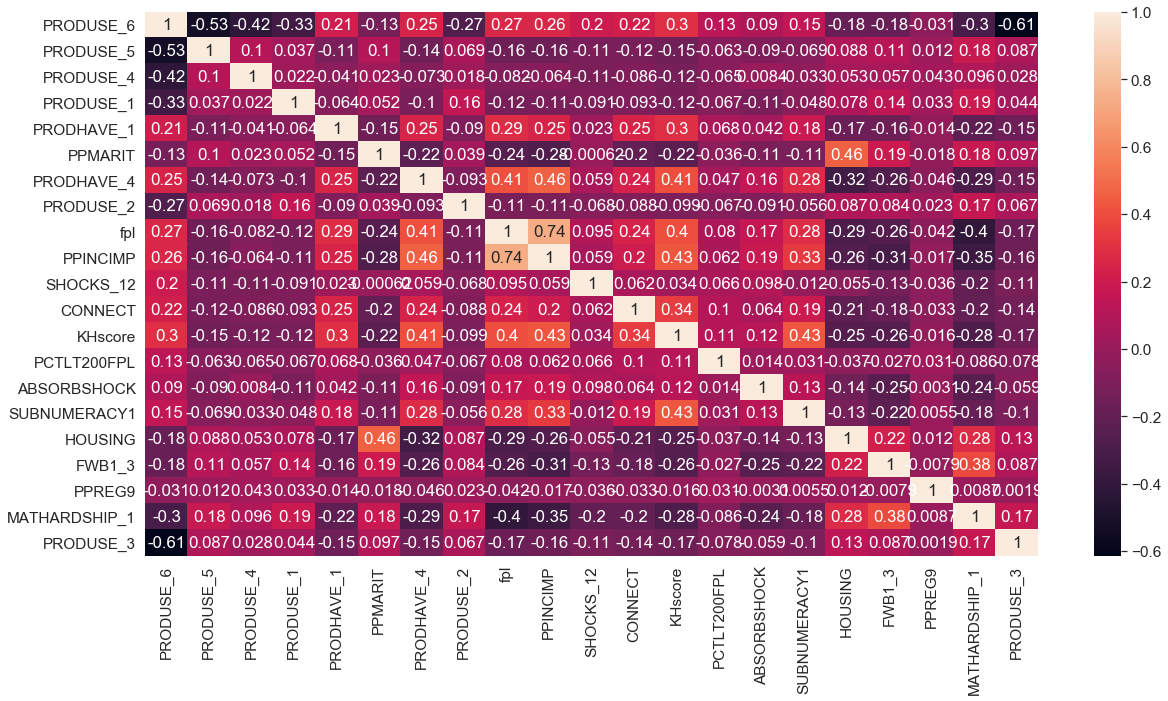

In [30]:
corr_columns = selected_columns = df_cfpb[['PRODUSE_6','PRODUSE_5','PRODUSE_4','PRODUSE_1','PRODHAVE_1','PPMARIT','PRODHAVE_4','PRODUSE_2',
                           'fpl','PPINCIMP','SHOCKS_12','CONNECT','KHscore','PCTLT200FPL','ABSORBSHOCK','SUBNUMERACY1',
                           'HOUSING','FWB1_3','PPREG9','MATHARDSHIP_1', 'PRODUSE_3']]

corr_columns.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_columns.corr(), annot=True)
plt.show()

In [10]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_predictor, target, 
                                                    test_size=0.3, random_state=0)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (3948, 20)
x_test  (1692, 20)
y_train  (3948, 1)
y_test  (1692, 1)


In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values 

X_train = X_train_scaled
X_test = X_test_scaled
X_train.describe()


,PRODUSE_6,PRODUSE_5,PRODUSE_4,PRODUSE_1,PRODHAVE_1,PPMARIT,PRODHAVE_4,PRODUSE_2,fpl,PPINCIMP,SHOCKS_12,CONNECT,KHscore,PCTLT200FPL,ABSORBSHOCK,SUBNUMERACY1,HOUSING,FWB1_3,PPREG9,MATHARDSHIP_1
count,3948.000000,3948.000000,3948.000000,3948.00000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000
mean,0.829281,0.053951,0.032421,0.02305,0.881712,0.249683,0.620567,0.015198,0.860056,0.595586,0.511905,0.706338,0.628575,0.235056,0.780142,0.685816,0.200861,0.367465,0.515641,0.095491
std,0.376311,0.225950,0.177139,0.15008,0.322989,0.345053,0.485307,0.122354,0.300928,0.323037,0.499922,0.320491,0.235412,0.424087,0.350197,0.273315,0.318032,0.290718,0.317236,0.240871
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.375000,0.000000,0.504950,0.446687,0.000000,0.666667,0.600000,0.000000,0.250000,0.250000,0.000000
50%,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.625000,1.000000,0.801980,0.691265,0.000000,1.000000,0.800000,0.000000,0.250000,0.500000,0.000000
75%,1.000000,0.000000,0.000000,0.00000,1.000000,0.500000,1.000000,0.000000,1.000000,0.875000,1.000000,0.980198,0.832831,0.000000,1.000000,1.000000,0.500000,0.500000,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Biuld the random forest classifier and estimate
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0, n_estimators=100,\
                                   criterion = 'entropy', max_leaf_nodes=30,n_jobs=-1)
model_RF = classifier.fit(X_train, y_train)

# WIthin test sample accuracy
acc_train_rf = round(classifier.score(X_train, y_train),2)*100
print(" Model accuracy within training data is : " +  str(acc_train_rf) +"%")

/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 Model accuracy within training data is : 98.0%


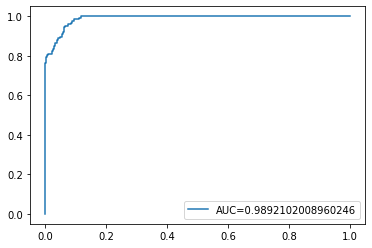

In [13]:
from sklearn import metrics

y_pred_proba = model_RF.predict_proba(X_test)[:,1]
#print(y_pred_proba)

fpr, tpr,t = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report
y_pred_RF =model_RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1566
           1       1.00      0.41      0.58       126

    accuracy                           0.96      1692
   macro avg       0.98      0.71      0.78      1692
weighted avg       0.96      0.96      0.95      1692



[[1566    0]
 [  74   52]]


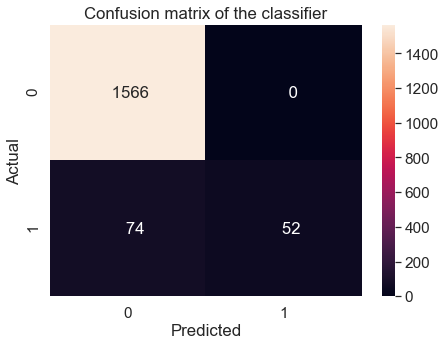

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_RF)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


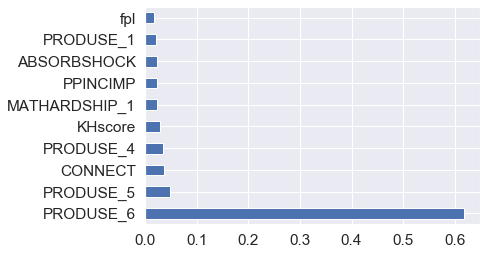

In [16]:
# Get feature importances
feature_importances = pd.Series(classifier.feature_importances_,index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [17]:
#AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AdaBoost = AdaBoostClassifier(n_estimators=100, 
                              base_estimator=DecisionTreeClassifier(max_depth=1),
                              random_state=0)

model_AB=AdaBoost.fit(X_train,y_train)

# train accuracy
acc_adaboost = round(AdaBoost.score(X_train, y_train) * 100, 2)
print("Model accuracy in the training sample is: ", acc_adaboost, "%")


/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy in the training sample is:  97.67 %


In [18]:
from sklearn.metrics import classification_report
y_pred_AB =model_AB.predict(X_test)
print(classification_report(y_test,y_pred_AB))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1566
           1       0.77      0.84      0.80       126

    accuracy                           0.97      1692
   macro avg       0.88      0.91      0.89      1692
weighted avg       0.97      0.97      0.97      1692



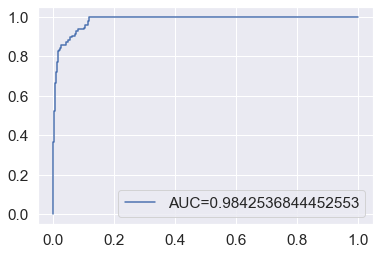

In [19]:
from sklearn import metrics

y_pred_proba = model_AB.predict_proba(X_test)[:,1]
#print(y_pred_proba)

fpr, tpr,t = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

[[1534   32]
 [  20  106]]


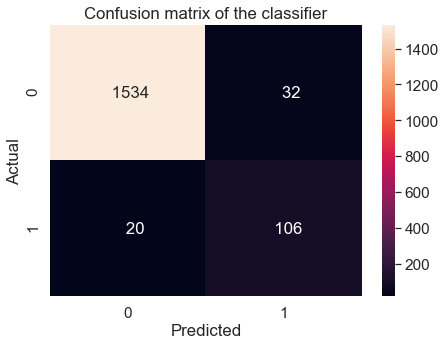

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_AB)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
# Implement XGboost
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)

# train accuracy
acc_xgboost = round(xg_model.score(X_train, y_train) * 100, 2)
print("Model accuracy in training sample is: ", acc_xgboost, "%")

# test accuracy
acc_xgboost_test = round(xg_model.score(X_test, y_test) * 100, 2)
print("Model accuracy in test sample is: ", acc_xgboost_test, "%")


/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy in training sample is:  98.48 %
Model accuracy in test sample is:  98.46 %


In [22]:
from sklearn.metrics import classification_report
y_pred_xg =xg_model.predict(X_test)
print(classification_report(y_test,y_pred_xg))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1566
           1       0.98      0.81      0.89       126

    accuracy                           0.98      1692
   macro avg       0.98      0.90      0.94      1692
weighted avg       0.98      0.98      0.98      1692



[[1564    2]
 [  24  102]]


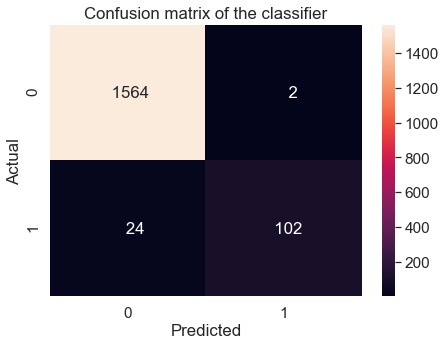

In [23]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_xg)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

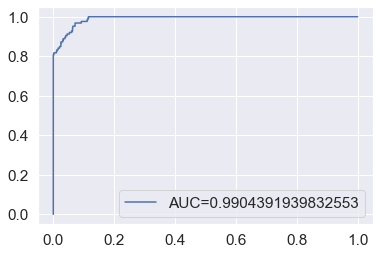

In [24]:
from sklearn import metrics

y_pred_proba = xg_model.predict_proba(X_test)[:,1]
#print(y_pred_proba)

fpr, tpr,t = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

In [25]:
#SVM
from sklearn import svm

model_svc = svm.SVC(probability = True)
model_svc_fit = model_svc.fit(X_train,y_train)


# train accuracy
acc_svc = round(model_svc_fit.score(X_train, y_train) * 100, 2)
print("Model accuracy in training sample is: ", acc_svc, "%")

# test accuracy
acc_svc_test = round(model_svc_fit.score(X_test, y_test) * 100, 2)
print("Model accuracy in test sample is: ", acc_svc_test, "%")

/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy in training sample is:  98.43 %
Model accuracy in test sample is:  98.52 %


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1566
           1       1.00      0.80      0.89       126

    accuracy                           0.99      1692
   macro avg       0.99      0.90      0.94      1692
weighted avg       0.99      0.99      0.98      1692

[[1566    0]
 [  25  101]]


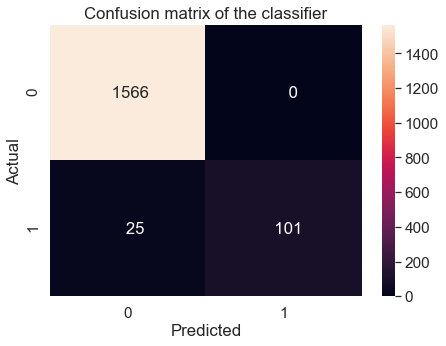

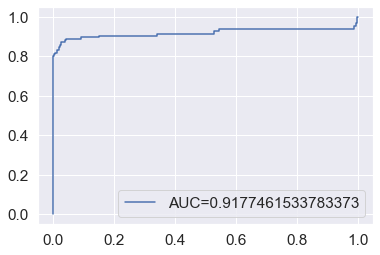

In [26]:
from sklearn.metrics import classification_report
y_pred_svm =model_svc.predict(X_test)
print(classification_report(y_test,y_pred_svm))


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_svm)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(cf_df,annot=True,fmt='5.0f')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


from sklearn import metrics

y_pred_proba = model_svc.predict_proba(X_test)[:,1]
#print(y_pred_proba)

fpr, tpr,t = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

In [27]:
# Tune the hyperparameters of the RF estimator
from sklearn.ensemble import RandomForestClassifier

 #before HP tuning
#classifier = RandomForestClassifier(random_state=0, n_estimators=100,\                                 criterion = 'entropy', max_leaf_nodes=30,n_jobs=-1)
#model_RF = classifier.fit(X_train, y_train)

# With HPP tuning
# Create the HP grid

from sklearn.model_selection import GridSearchCV

param_grid_new = {
    'bootstrap':[True],
    'max_depth':[80,90],
    'max_features':[2],
    'min_samples_leaf':[3,4],
    'min_samples_split':[8,10],
    'n_estimators':[100]
}

# Create a RF model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_new, cv=3, verbose=1)

#Fir the grid search model to data
grid_search_rf.fit(X_train,y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [28]:
best_grid = grid_search_rf.best_estimator_
print("Grid search accuracy:", round(best_grid.score(X_train, y_train) * 100, 2),"%" )

print("Test sample Grid search accuracy:", round(best_grid.score(X_test, y_test) * 100, 2),"%" )

Grid search accuracy: 94.86 %
Test sample Grid search accuracy: 92.79 %


In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_new = {
    'bootstrap':[True],
    'max_depth':[80,90],
    'max_features':[2],
    'min_samples_leaf':[3,4],
    'min_samples_split':[8,10],
    'n_estimators':[100]
}


# Create a RF model
rf = RandomForestClassifier()

# Instantiate the grid search model
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_new, n_iter=10, cv=3, verbose=1, random_state=42)

#Fir the grid search model to data
random_search_rf.fit(X_train,y_train)
random_search_rf.best_params_

best_random = random_search_rf.best_estimator_
print("Random search accuracy:", round(best_random.score(X_train, y_train) * 100, 2),"%" )

print("Test sample Random search accuracy:", round(best_random.score(X_test, y_test) * 100, 2),"%" )

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/utkarshshroff/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/utkarshshr

Random search accuracy: 97.54 %
Test sample Random search accuracy: 93.68 %
